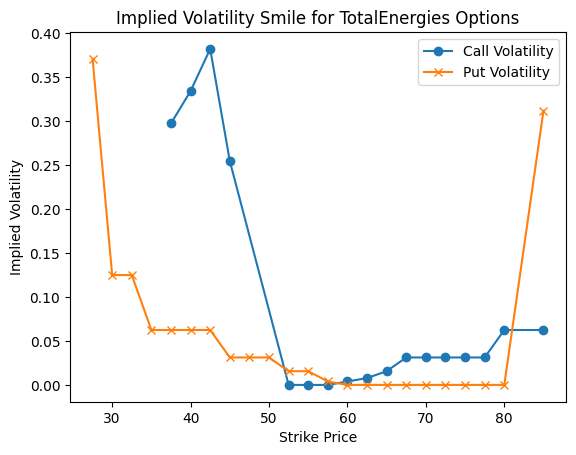

Call price: 0.18
Put price: 0.00


In [14]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Calcul du prix d'une option avec Black-Scholes
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Récupérer les données de TotalEnergies (ticker: TTE)
stock = yf.Ticker('TTE')
expiration_date = '2027-01-15'

if expiration_date in stock.options:
    options = stock.option_chain(expiration_date)
    calls, puts = options.calls, options.puts
    calls = calls.drop(index=4) # Lissage de la courbe de volatilité implicite

    # Tracer les courbes de volatilité implicite
    plt.plot(calls['strike'], calls['impliedVolatility'], label='Call Volatility', marker='o')
    plt.plot(puts['strike'], puts['impliedVolatility'], label='Put Volatility', marker='x')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.title('Implied Volatility Smile for TotalEnergies Options')
    plt.legend()
    plt.show()

    # Récupérer le prix actuel de l'actif
    S = stock.history(period='1d')['Close'].iloc[-1]
    r = 0.01  # Taux sans risque
    target_strike = 60
    T = (pd.to_datetime(expiration_date) - pd.Timestamp.today()).days / 365

    # Interpoler la volatilité implicite pour le strike cible
    call_volatility = np.interp(target_strike, calls['strike'], calls['impliedVolatility'])
    put_volatility = np.interp(target_strike, puts['strike'], puts['impliedVolatility'])
    
    # Calculer les prix des options
    call_price = black_scholes(S, target_strike, T, r, call_volatility, 'call')
    put_price = black_scholes(S, target_strike, T, r, put_volatility, 'put')

    print(f"Call price: {call_price:.2f}")
    print(f"Put price: {put_price:.2f}")
else:
    print(f"La date d'échéance {expiration_date} n'est pas disponible.")




,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TTE260116P00027500,2025-01-24 19:48:59+00:00,27.5,0.15,0.00,0.00,0.0,0.0,4,0,0.125009,False,REGULAR,USD
1,TTE260116P00030000,2025-01-24 19:48:59+00:00,30.0,0.20,0.00,0.00,0.0,0.0,3,0,0.125009,False,REGULAR,USD
2,TTE260116P00032500,2025-01-03 17:54:55+00:00,32.5,0.35,0.00,0.00,0.0,0.0,1,0,0.125009,False,REGULAR,USD
3,TTE260116P00035000,2025-01-23 19:58:24+00:00,35.0,0.35,0.00,0.00,0.0,0.0,1,0,0.125009,False,REGULAR,USD
4,TTE260116P00037500,2024-12-17 14:30:01+00:00,37.5,0.80,0.40,0.55,0.0,0.0,2,106,0.327643,False,REGULAR,USD
5,TTE260116P00040000,2025-01-08 14:30:01+00:00,40.0,0.80,0.00,0.00,0.0,0.0,2,0,0.062509,False,REGULAR,USD
6,TTE260116P00042500,2025-01-08 20:47:32+00:00,42.5,1.05,0.00,0.00,0.0,0.0,1,0,0.062509,False,REGULAR,USD
7,TTE260116P00045000,2025-01-22 20:46:17+00:00,45.0,1.25,0.00,0.00,0.0,0.0,80,0,0.062509,False,REGULAR,USD
8,TTE260116P00047500,2025-01-17 14:36:26+00:00,47.5,1.50,0.00,0.00,0.0,0.0,1,0,0.062509,False,REGULAR,USD
9,TTE260116P00050000,2025-01-16 16:11:55+00:00,50.0,2.01,0.00,0.00,0.0,0.0,2,0,0.031260,False,REGULAR,USD
